1. Data Preparation
2. Model Selection
3. Model Training
4. Model Evaluation
5. Hyperparameter Tuning


### 1. Data Preparation
* Data Cleaning: Handle missing values, remove duplicates, and correct errors.
* Feature Engineering: Create new features, transform variables, and encode categorical variables.
* Feature Selection: Select the most relevant features using techniques like correlation analysis, recursive feature elimination, etc.
* Data Splitting: Split the data into training, validation, and test sets (e.g., 70% training, 15% validation, 15% test).

In [17]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [18]:
df = pd.read_csv('/content/processed_data.csv')

In [19]:
df.head()

,time,day_of_week,age_band_of_driver,sex_of_driver,educational_level,vehicle_driver_relation,driving_experience,type_of_vehicle,owner_of_vehicle,service_year_of_vehicle,...,vehicle_movement,casualty_class,sex_of_casualty,age_band_of_casualty,casualty_severity,work_of_casuality,fitness_of_casuality,pedestrian_movement,cause_of_accident,accident_severity
0,2025-01-31 17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Moving Backward,Slight Injury
1,2025-01-31 17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Overtaking,Slight Injury
2,2025-01-31 17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Unknown,...,Going straight,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the left,Serious Injury
3,2025-01-31 01:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Unknown,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,2025-01-31 01:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Owner,5-10yrs,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Overtaking,Slight Injury


In [20]:
df.isnull().sum()

,0
time,0
day_of_week,0
age_band_of_driver,0
sex_of_driver,0
educational_level,0
vehicle_driver_relation,0
driving_experience,0
type_of_vehicle,0
owner_of_vehicle,0
service_year_of_vehicle,0


In [21]:
lists=['vehicle_driver_relation', 'work_of_casuality', 'fitness_of_casuality','day_of_week','casualty_severity','time','sex_of_driver','educational_level','defect_of_vehicle','owner_of_vehicle','service_year_of_vehicle', 'road_surface_type','sex_of_casualty']
df.drop(columns = lists, inplace=True)

In [22]:
df.columns

Index(['age_band_of_driver', 'driving_experience', 'type_of_vehicle',
       'area_accident_occured', 'lanes_or_medians', 'road_allignment',
       'types_of_junction', 'road_surface_conditions', 'light_conditions',
       'weather_conditions', 'type_of_collision',
       'number_of_vehicles_involved', 'number_of_casualties',
       'vehicle_movement', 'casualty_class', 'age_band_of_casualty',
       'pedestrian_movement', 'cause_of_accident', 'accident_severity'],
      dtype='object')

In [23]:
X = df.drop('accident_severity', axis=1)
y = df['accident_severity']

In [24]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

#categorical_features = df.select_dtypes(include=['object']).columns.tolist() #  categorical features
categorical_features = X.select_dtypes(include=['object']).columns
numeric_features = [col for col in X.columns if col not in categorical_features]

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))  # Replace LabelEncoder with OneHotEncoder
])

# Preprocessing for numerical data
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())  # Apply StandardScaler to numerical features
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Apply the preprocessor to your data
#X_train_scaled = preprocessor.fit_transform(X_train)
#X_test_scaled = preprocessor.transform(X_test)

### 1. Model Selection
1. Choose Models: Select a variety of models to train. Common choices include:
* Linear Models: Linear Regression, Logistic Regression.
* Tree-Based Models: Decision Trees, Random Forest, Gradient Boosting Machines (GBM), XGBoost, LightGBM, CatBoost.
* Support Vector Machines (SVM): SVR, SVC.
* Neural Networks: MLP, CNN, RNN.
* Ensemble Methods: Bagging, Boosting, Stacking.
* Clustering Models: K-Means, DBSCAN (for unsupervised learning).

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score




In [28]:
models={
        "LogisticRegression":LogisticRegression(),
        "Decision Tree":DecisionTreeClassifier(),
        "SVM":SVC(),
        "KNN":KNeighborsClassifier(),
        "GNB":GaussianNB(),
        "Random Forest":RandomForestClassifier(),
        "AdaBoost":AdaBoostClassifier(),
        "Gradient Boosting":GradientBoostingClassifier(),
        "LightGBM":lgb.LGBMClassifier(),
        }

In [29]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

### 3. Model Training

In [30]:
def model_accuracy(models,X,y):
    # Train/Test Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


    acc_result = {}

    for name, model in models.items():
        model_pipeline = Pipeline([
            ('preprocessor', preprocessor),
            ('model', model)
        ])

        model_fit = model_pipeline.fit(X_train, y_train)
        y_pred = model_fit.predict(X_test)

        acc = accuracy_score(y_test, y_pred)
        acc_result[name] = acc

        print(f"The accuracy for {name} is: {acc:.4f}")

        acc_result[name] = acc

    return acc_result

In [31]:
def bestModel(result):
    high=0
    for name,acc in result.items():
        if acc>high:
            high=acc
            model_name=name
    print("Best Model is ",model_name," with accuaracy =>",high)

In [32]:
acc=model_accuracy(models,X,y)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The accuracy for LogisticRegression is: 0.8316
The accuracy for Decision Tree is: 0.7836
The accuracy for SVM is: 0.8323
The accuracy for KNN is: 0.8264
The accuracy for GNB is: 0.0756
The accuracy for Random Forest is: 0.8547
The accuracy for AdaBoost is: 0.8316
The accuracy for Gradient Boosting is: 0.8353
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005555 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 286
[LightGBM] [Info] Number of data points in the train set: 12164, number of used features: 137
[LightGBM] [Info] Start training from score -4.415803
[LightGBM] [Info] Start training from score -1.988656
[LightGBM] [Info] Start training from score -0.161301


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


The accuracy for LightGBM is: 0.8353


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


### 4.Model Evaluation


In [33]:
def bestModel(result):
    high=0
    for name,acc in result.items():
        if acc>high:
            high=acc
            model_name=name
    print("Best Model is ",model_name," with accuaracy =>",high)

In [34]:
bestModel(acc)

Best Model is  Random Forest  with accuaracy => 0.8546530746464979


### 5. Hypermparameter tuning

In [35]:
X = df.drop('accident_severity', axis=1)
y = df['accident_severity']

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
# Create a ColumnTransformer for LabelEncoding to categorical features and StandardScaler to numerical features
categorical_features = df.select_dtypes(include=['object']).columns.tolist() #  categorical features
# Ensure 'time' and other removed features are not in categorical_features
categorical_features = [f for f in categorical_features if f in X_train.columns]
numeric_features = [col for col in df.columns if col not in categorical_features and col != 'accident_severity']

categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))  # Replace LabelEncoder with OneHotEncoder
])
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())  # Apply StandardScaler to numerical features
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Apply the preprocessor to your data
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

In [39]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [25,50],
    'criterion': ['gini', 'entropy','log_loss'],

     'max_features': ['sqrt', 'log2'],

}

In [40]:
model = RandomForestClassifier()
cv = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='accuracy',  # Use 'accuracy' for classification
    cv=5,  # 5-fold cross-validation
    n_jobs=-1,  # Use all available CPU cores
    verbose=2  # Print progress
)

In [41]:
cv.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [25, 50]},
             scoring='accuracy', verbose=2)

In [42]:
# Get the best parameters and best score
best_params = cv.best_params_
best_score = cv.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation Accuracy:", best_score)

Best Parameters: {'criterion': 'gini', 'max_features': 'log2', 'n_estimators': 25}
Best Cross-Validation Accuracy: 0.8655050416964112


In [52]:
# Initialize the Random Forest model with the best parameters
best_rf_model = RandomForestClassifier(**best_params, random_state=42)

# Train the model
best_rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = best_rf_model.predict(X_test_scaled)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Test Set Accuracy:", accuracy)



Test Set Accuracy: 0.8553107530417626


In [44]:
best_rf_model = cv.best_estimator_
best_rf_model


RandomForestClassifier(max_features='log2', n_estimators=25)

In [53]:
 best_rf_model.feature_importances_

array([3.57872608e-02, 3.00891758e-02, 1.80533084e-02, 1.62977136e-02,
       1.19307167e-02, 8.32502917e-03, 9.57482332e-03, 1.37251313e-02,
       1.63249022e-02, 2.01489169e-02, 1.62158200e-02, 1.24978253e-02,
       1.57439365e-03, 7.83701962e-04, 1.94998298e-02, 5.20263674e-04,
       3.55801591e-04, 6.11630292e-03, 7.33131657e-03, 1.33945298e-02,
       3.87034986e-03, 1.08281947e-02, 7.50734840e-03, 7.00889390e-03,
       8.82604812e-03, 5.31813023e-03, 1.10961562e-03, 2.36299578e-03,
       7.27652742e-03, 4.41641856e-03, 9.64255526e-04, 1.32480585e-03,
       6.16557804e-04, 2.92005375e-03, 8.64605316e-03, 1.72608652e-03,
       5.54144180e-03, 3.45487074e-03, 1.47776557e-02, 1.78544507e-02,
       2.24449651e-04, 1.20766802e-02, 3.41595405e-04, 7.03293564e-04,
       5.03189038e-03, 7.90529235e-04, 8.57875524e-03, 8.15735634e-03,
       3.09636976e-05, 1.95220975e-02, 3.18189583e-03, 1.79190644e-02,
       1.05303528e-03, 1.32971594e-02, 2.05770955e-03, 1.91166440e-03,
      

In [54]:
importances = best_rf_model.feature_importances_
# Get feature names after preprocessing
feature_names = preprocessor.get_feature_names_out()

feature_importances_df = pd.DataFrame({
    'Feature': feature_names,  # Use feature names after preprocessing
    'Importance': importances
})

In [55]:
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)
feature_importances_df

,Feature,Importance
0,num__number_of_vehicles_involved,3.578726e-02
1,num__number_of_casualties,3.008918e-02
9,cat__driving_experience_5-10yr,2.014892e-02
49,cat__lanes_or_medians_Two-way (divided with br...,1.952210e-02
14,cat__type_of_vehicle_Automobile,1.949983e-02
...,...,...
125,"cat__pedestrian_movement_In carriageway, stati...",9.418941e-05
69,cat__types_of_junction_X Shape,8.514903e-05
48,cat__lanes_or_medians_Other,3.096370e-05
72,cat__road_surface_conditions_Flood over 3cm. deep,2.797885e-05


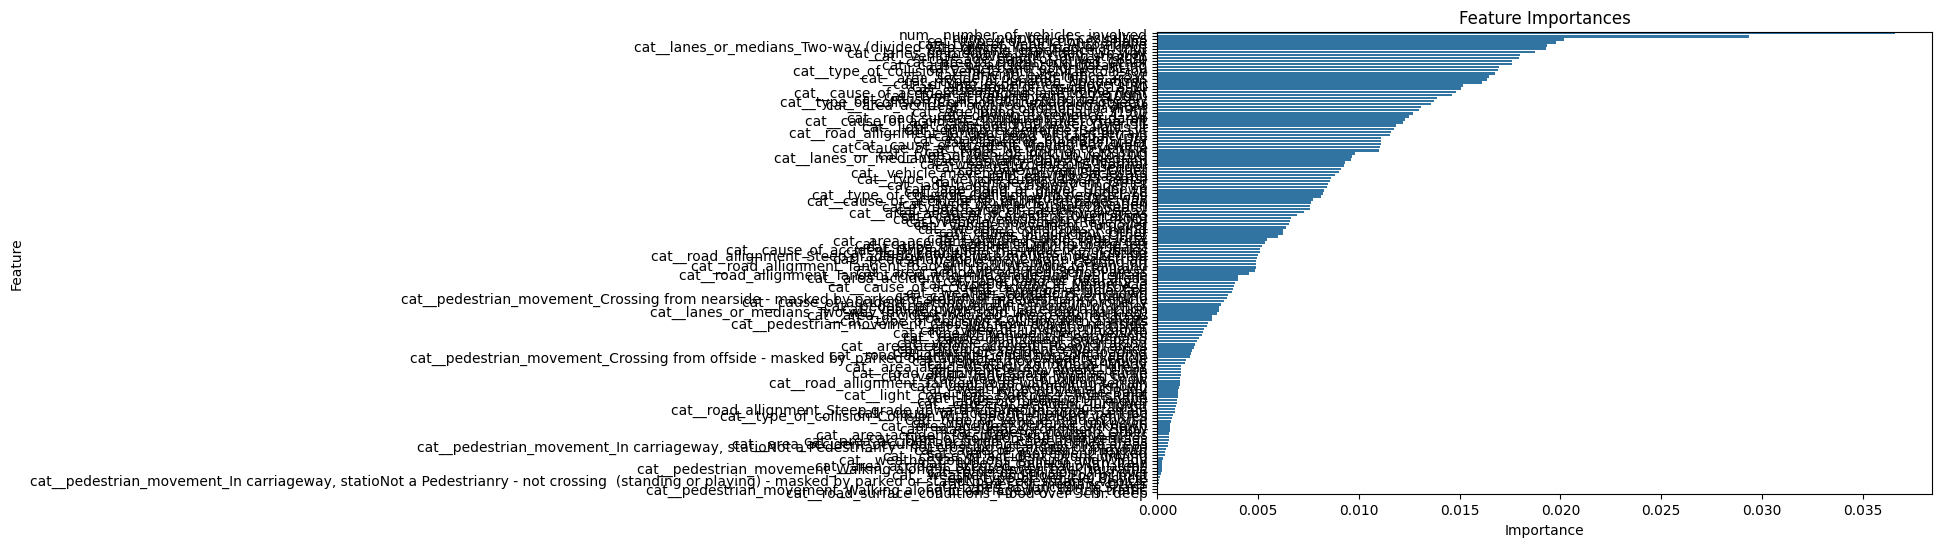

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df)
plt.title('Feature Importances')
plt.show()